In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

In [2]:
df = pd.read_csv("/Users/carnevale10/Desktop/HospInfo.csv")
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [3]:
nrows = df.shape[0]
num_unique_hosp = df['Provider ID'].nunique()
print("Is Provider ID a unique identifier?: {0}".format(nrows == num_unique_hosp))

Is Provider ID a unique identifier?: True


In [4]:
df = df.replace('Not Available', np.nan)
cols_to_drop = list(df.filter(regex='footnote'))
df_clean = df[df.columns.drop(cols_to_drop)]
df_clean

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,True,4,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,CLEAR LAKE REGIONAL MEDICAL CENTER,500 MEDICAL CENTER BLVD,WEBSTER,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,...,True,3,Above the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410..."
4808,520194,ORTHOPAEDIC HOSPITAL OF WISCONSIN,475 W RIVER WOODS PKWY,GLENDALE,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,...,NaN,NaN,NaN,NaN,NaN,Above the national average,NaN,NaN,NaN,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982..."
4809,491302,CARILION GILES COMMUNITY HOSPITAL,159 HARTLEY WAY,PEARISBURG,VA,24134,GILES,5409216000,Critical Access Hospitals,Voluntary non-profit - Private,...,True,4,Same as the national average,NaN,Same as the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -..."
4810,510012,PLEASANT VALLEY HOSPITAL,2520 VALLEY DRIVE,POINT PLEASANT,WV,25550,MASON,3046754340,Acute Care Hospitals,Voluntary non-profit - Private,...,True,3,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Below the national average,Above the national average,Same as the national average,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868..."


In [5]:
df_clean['Patient experience national comparison'].value_counts(normalize=True)

Above the national average      0.352599
Same as the national average    0.333430
Below the national average      0.313970
Name: Patient experience national comparison, dtype: float64

In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

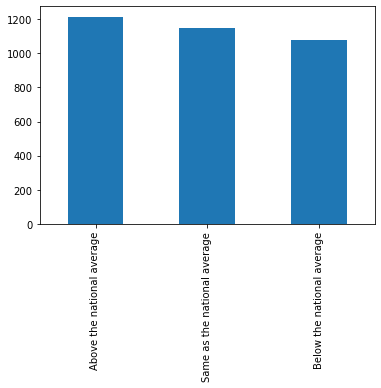

In [7]:
df_clean['Patient experience national comparison'].value_counts().plot(kind='bar')

In [8]:
df_clean.isnull().mean().sort_values(ascending=False)

Safety of care national comparison                      0.450540
Efficient use of medical imaging national comparison    0.422485
Patient experience national comparison                  0.284497
Mortality national comparison                           0.280964
Timeliness of care national comparison                  0.263092
Hospital overall rating                                 0.258728
Effectiveness of care national comparison               0.249792
Readmission national comparison                         0.211347
Meets criteria for meaningful use of EHRs               0.029925
County Name                                             0.003117
Provider ID                                             0.000000
Emergency Services                                      0.000000
Hospital Name                                           0.000000
Hospital Ownership                                      0.000000
Hospital Type                                           0.000000
Phone Number             

In [9]:
df_clean = df_clean.drop([
    "Hospital Name", "Address", "City", 
    "State", "ZIP Code", "Phone Number",
    "County Name", "Location"], axis =1)

In [10]:
df_clean.dtypes

Provider ID                                              int64
Hospital Type                                           object
Hospital Ownership                                      object
Emergency Services                                        bool
Meets criteria for meaningful use of EHRs               object
Hospital overall rating                                 object
Mortality national comparison                           object
Safety of care national comparison                      object
Readmission national comparison                         object
Patient experience national comparison                  object
Effectiveness of care national comparison               object
Timeliness of care national comparison                  object
Efficient use of medical imaging national comparison    object
dtype: object

In [11]:
df_clean['Meets criteria for meaningful use of EHRs'] = \
df_clean['Meets criteria for meaningful use of EHRs'].astype(bool)
df_clean['Hospital overall rating'] = df_clean['Hospital overall rating'].astype(float)

In [12]:
df_clean.dtypes

Provider ID                                               int64
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                         bool
Meets criteria for meaningful use of EHRs                  bool
Hospital overall rating                                 float64
Mortality national comparison                            object
Safety of care national comparison                       object
Readmission national comparison                          object
Patient experience national comparison                   object
Effectiveness of care national comparison                object
Timeliness of care national comparison                   object
Efficient use of medical imaging national comparison     object
dtype: object

In [13]:
dv = pd.get_dummies(df_clean[['Hospital Type', 'Hospital Ownership']] )
dv.head()

,Hospital Type_Acute Care Hospitals,Hospital Type_Childrens,Hospital Type_Critical Access Hospitals,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
df_clean = df_clean.drop(['Hospital Type', 'Hospital Ownership'], axis=1)
df_clean = pd.concat([df_clean, dv], axis=1)
df_clean.head()

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,10005,True,True,3.0,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,...,0,1,0,0,0,0,0,0,0,0
1,10012,True,True,3.0,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,1,0,0,0,0
2,10032,True,True,4.0,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,...,0,1,0,0,0,0,0,0,0,0
3,10095,True,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,...,0,0,1,0,0,0,0,0,0,0
4,10131,True,True,3.0,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,1,0,0,0,0


In [16]:
y = df_clean.pop("Patient experience national comparison")
X = df_clean

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Original X: {0}, Original y: {1}".format(X.shape, y.shape))
print("X Train: {0}, y train: {1}".format(X_train.shape, y_train.shape))
print("X Train: {0}, y test: {1}".format(X_test.shape, y_test.shape))

Original X: (4812, 23), Original y: (4812,)
X Train: (3849, 23), y train: (3849,)
X Train: (963, 23), y test: (963,)


In [17]:
X_train_id = X_train.pop("Provider ID")
X_test_id = X_test.pop("Provider ID")

In [18]:
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance

xgb = XGBClassifier(seed = 123)

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: {:.2f}%".format(accuracy * 100))

/Users/carnevale10/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:19:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 38.42%


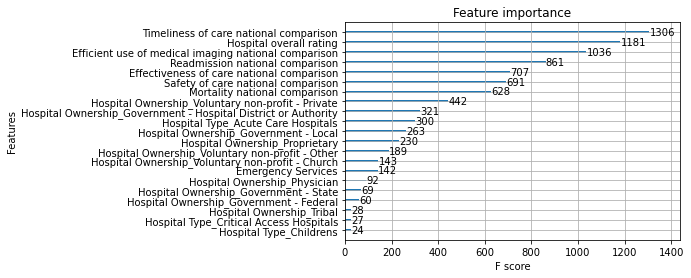

In [19]:
plot_importance(xgb)
plt.show()

In [22]:
subset = [
    "Hospital overall rating", "Safety of care national comparison",
    "Efficient use of medical imaging national comparison", 
    "Timeliness of care national comparison", "Mortality national comparison", 
    "Effectiveness of care national comparison", "Readmission national comparison"
]
X_train = X_train[subset]
X_test = X_test[subset]

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: {:.2f}%".format(accuracy * 100))

/Users/carnevale10/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 38.73%


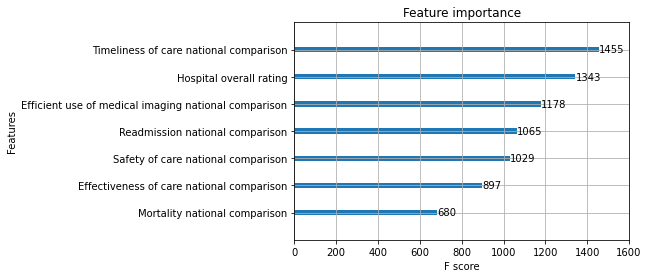

In [23]:
plot_importance(xgb)
plt.show()